#**Import Library**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import pandas as pd
import math
from math import sqrt
from scipy import stats
from datetime import datetime

#**Read Dataset**

In [29]:
#from google.colab import drive
#drive.mount("/content/drive")

#jika dari dataset github
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/eq_1970_M6.csv"
data = pd.read_csv(dataset)
data

,time,latitude,longitude,depth,mag,magType,place
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,"1km E of Kampungbaru, Indonesia"
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,"80km WNW of Bouvet Island, Bouvet Island"
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,"63km NNE of Kerman, Iran"
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,"53km NNE of Kerman, Iran"
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,"50km NW of Fais, Micronesia"
...,...,...,...,...,...,...,...
6709,1970-01-10T12:07:07.000Z,6.7850,126.6820,40.0,7.2,mw,"Mindanao, Philippines"
6710,1970-01-08T17:12:41.000Z,-34.8500,178.7820,199.4,6.8,mw,south of the Kermadec Islands
6711,1970-01-07T07:56:14.000Z,15.7850,-59.8080,36.7,6.0,mw,"east of Guadeloupe, Leeward Islands"
6712,1970-01-06T05:35:54.000Z,-9.5830,151.4930,15.0,6.3,mw,D'Entrecasteaux Islands region


In [30]:
#reduksi kolom
data = data[['time', 'latitude', 'longitude', 'depth', 'mag','magType']]
data

,time,latitude,longitude,depth,mag,magType
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww
...,...,...,...,...,...,...
6709,1970-01-10T12:07:07.000Z,6.7850,126.6820,40.0,7.2,mw
6710,1970-01-08T17:12:41.000Z,-34.8500,178.7820,199.4,6.8,mw
6711,1970-01-07T07:56:14.000Z,15.7850,-59.8080,36.7,6.0,mw
6712,1970-01-06T05:35:54.000Z,-9.5830,151.4930,15.0,6.3,mw


**Plot Tipe Magnitude**

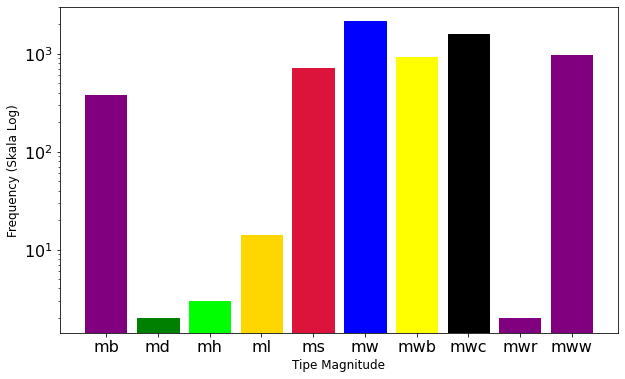

In [31]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
list_1=[1 for i in range(6714)]
data['ones']=list_1

grouped=data.iloc[:,6].groupby(data['magType'])
data['magType'].sort_values(ascending=False) 
grouped_DATA_Magnitude=grouped.sum()
index_grouped_DATA_Magnitude=grouped_DATA_Magnitude.index
ax1=plt.bar(index_grouped_DATA_Magnitude,grouped_DATA_Magnitude,color='purple')#,align='left')
plt.xlabel("Tipe Magnitude",fontsize=12)
plt.ylabel("Frequency (Skala Log)",fontsize=12)
plt.yscale('log')
ax1[1].set_color('green')
ax1[2].set_color('lime')
ax1[3].set_color('gold')
ax1[4].set_color('crimson')
ax1[5].set_color('blue')
ax1[6].set_color('yellow')
ax1[7].set_color('black')
plt.tick_params(labelsize=16) 

In [32]:
#reduksi kolom

data1=data[data['magType']=="mw"]
data2=data[data['magType']=="mwb"]
data3=data[data['magType']=="mwc"]
data4=data[data['magType']=="mwr"]
data5=data[data['magType']=="mww"] 
ambildata=pd.concat([data1, data2, data3, data4, data5])

datafix = ambildata[['time', 'latitude', 'longitude', 'depth', 'mag','magType']]
datafix

,time,latitude,longitude,depth,mag,magType
441,2014-08-24T10:20:44.070Z,38.215167,-122.312333,11.120,6.02,mw
538,2014-03-10T05:18:13.430Z,40.828667,-125.133833,16.441,6.80,mw
797,2012-04-11T08:38:36.720Z,2.327000,93.063000,20.000,8.60,mw
1154,2010-04-04T22:40:42.360Z,32.286167,-115.295333,9.987,7.20,mw
1185,2010-02-27T10:30:10.000Z,-37.878000,-73.545000,20.000,6.00,mw
...,...,...,...,...,...,...
1269,2009-10-03T17:36:06.120Z,23.630000,121.452000,28.000,6.10,mww
1391,2008-11-16T17:02:32.700Z,1.271000,122.091000,30.000,7.40,mww
1619,2007-09-12T11:10:26.830Z,-4.438000,101.367000,34.000,8.40,mww
2002,2005-03-28T16:09:36.530Z,2.085000,97.108000,30.000,8.60,mww


#**Menghitung a-value and b-value**



*   Parameter seismitas atau yang biasa disebut **nilai-a** merupakan parameter seismik yang nilainya bergantung pada jumlah kejadian gempa bumi
*   Parameter tektonik atau **nilai-b** dapat mencerminkan akumulasi stress lokal sehingga dapat menjadi parameter kegempaan yang didapat dari frekuensi relatif dari jumlah kejadian gempa besar dan gempa kecil di suatu wilayah. Selain itu, Nilai-b digunakan untuk mengetahui perubahan fenomena fisis yang diamati sebelum terjadinya gempa bumi

In [33]:
binning=0.1
#data["B - Value"] = np.sqrt(data["mag"])
data["B - Value"] = np.math.log10(math.exp(1))/(data.mag.mean()-(data["mag"]-binning/2))
data["A - Value"] = np.log10(data.mag.shape[0]) + (math.log10(math.exp(1))/(data.mag.mean()-(data["mag"]-binning/2))) * data.mag.min()
data['dt_time'] = data['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))
data["tahun"] = data['dt_time'].apply(lambda x: x.year)
datalagi = data
datalagi

,time,latitude,longitude,depth,mag,magType,ones,B - Value,A - Value,dt_time,tahun
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,1,-6.156655,-33.112946,2017-12-15 16:47:58.230,2017
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,1,-6.156655,-33.112946,2017-12-13 18:03:43.920,2017
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,1,1.011259,9.894533,2017-12-12 21:41:31.140,2017
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,1,1.011259,9.894533,2017-12-12 08:43:18.320,2017
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,1,1.318204,11.736203,2017-12-09 15:14:24.770,2017
...,...,...,...,...,...,...,...,...,...,...,...
6709,1970-01-10T12:07:07.000Z,6.7850,126.6820,40.0,7.2,mw,1,-0.563623,0.445243,1970-01-10 12:07:07.000,1970
6710,1970-01-08T17:12:41.000Z,-34.8500,178.7820,199.4,6.8,mw,1,-1.172056,-3.205356,1970-01-08 17:12:41.000,1970
6711,1970-01-07T07:56:14.000Z,15.7850,-59.8080,36.7,6.0,mw,1,1.011259,9.894533,1970-01-07 07:56:14.000,1970
6712,1970-01-06T05:35:54.000Z,-9.5830,151.4930,15.0,6.3,mw,1,3.354679,23.955053,1970-01-06 05:35:54.000,1970


In [34]:
#reduksi kolom
fixkolom = data[['time','latitude', 'longitude', 'depth', 'mag','magType','tahun','B - Value','A - Value']]
fixkolom

,time,latitude,longitude,depth,mag,magType,tahun,B - Value,A - Value
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,2017,-6.156655,-33.112946
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,2017,-6.156655,-33.112946
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,2017,1.011259,9.894533
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,2017,1.011259,9.894533
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,2017,1.318204,11.736203
...,...,...,...,...,...,...,...,...,...
6709,1970-01-10T12:07:07.000Z,6.7850,126.6820,40.0,7.2,mw,1970,-0.563623,0.445243
6710,1970-01-08T17:12:41.000Z,-34.8500,178.7820,199.4,6.8,mw,1970,-1.172056,-3.205356
6711,1970-01-07T07:56:14.000Z,15.7850,-59.8080,36.7,6.0,mw,1970,1.011259,9.894533
6712,1970-01-06T05:35:54.000Z,-9.5830,151.4930,15.0,6.3,mw,1970,3.354679,23.955053


In [59]:
#Object Date Time
fixkolom['dt_time'] = fixkolom['time'].apply(lambda x: 
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
fixkolom['dofy'] = fixkolom['dt_time'].apply(lambda x: x.strftime("%j"))
fixkolom['dofy'] = fixkolom['dofy'].astype(str).astype(int)

fixkolom['year'] = fixkolom['dt_time'].apply(lambda x: x.year)
fixkolom['month'] = fixkolom['dt_time'].apply(lambda x: x.month)
fixkolom['day'] = fixkolom['dt_time'].apply(lambda x: x.day)

# Menghitung jumlah kejadian gempa per waktu (DMY) 
dofy_tot = fixkolom['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = fixkolom['year'].value_counts(sort=True)
month_tot = fixkolom['month'].value_counts(sort=True)
day_tot = fixkolom['day'].value_counts(sort=True)

# Menghitung rata-rata kejadian gempa per waktu (DMY) 
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

#**Variasi temporal nilai-b**

In [62]:
# Groupby & multiple aggregations
result = fixkolom.groupby('tahun')['B - Value'].aggregate(['mean','min','max','sum'])
print(result)

           mean        min        max         sum
tahun                                            
1970   0.998361  -6.156655  14.742167  159.737700
1971   1.039853  -6.156655  14.742167  158.057647
1972   1.472388  -6.156655  14.742167  210.551493
1973   1.608681  -6.156655  14.742167  149.607364
1974   0.760571  -6.156655  14.742167   72.254237
1975   0.714705  -6.156655  14.742167   75.758718
1976   1.350475  -6.156655  14.742167  147.201818
1977   1.437273  -6.156655  14.742167  122.168193
1978   1.576984  -6.156655  14.742167  141.928547
1979   1.843295  -6.156655  14.742167  158.523334
1980   1.213078  -6.156655  14.742167  115.242405
1981   1.699531  -6.156655  14.742167  144.460107
1982   1.955488  -6.156655  14.742167  170.127482
1983   1.990822  -6.156655  14.742167  270.751812
1984   2.475122  -6.156655  14.742167  336.616535
1985   1.856608  -6.156655  14.742167  297.057350
1986   1.837039  -6.156655  14.742167  257.185510
1987   1.309011  -6.156655  14.742167  217.295907


In [63]:
b_tot = fixkolom.groupby("tahun")["B - Value"].sum()

b_ave = result["sum"].mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


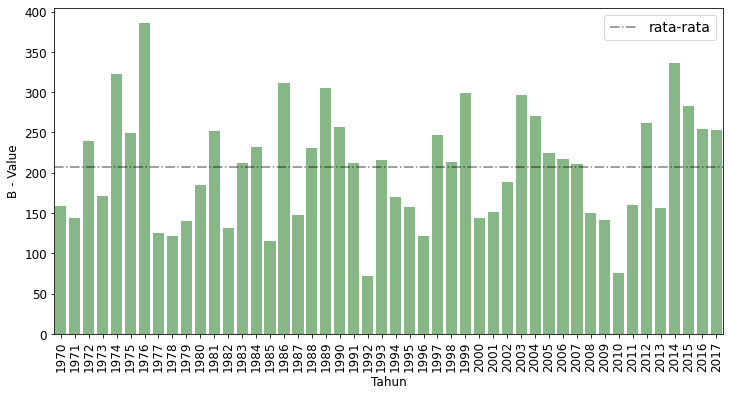

In [64]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(year_tot.index, b_tot, alpha=0.5, color='green')
plt.axhline(y=b_ave, color='k', linestyle='-.', 
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('B - Value')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

#**Variasi temporal nilai-a**

In [65]:
# Groupby & multiple aggregations
result2 = fixkolom.groupby('tahun')['A - Value'].aggregate(['mean','min','max','sum'])
print(result2)

            mean         min        max          sum
tahun                                               
1970    9.817145  -33.112946  92.279982  1570.743215
1971   10.066099  -33.112946  92.279982  1530.047047
1972   12.661310  -33.112946  92.279982  1810.567292
1973   13.479069  -33.112946  92.279982  1253.553450
1974    8.390407  -33.112946  92.279982   797.088647
1975    8.115211  -33.112946  92.279982   860.212329
1976   11.929834  -33.112946  92.279982  1300.351874
1977   12.450618  -33.112946  92.279982  1058.302570
1978   13.288884  -33.112946  92.279982  1195.999601
1979   14.886749  -33.112946  92.279982  1280.260399
1980   11.105449  -33.112946  92.279982  1055.017659
1981   14.024165  -33.112946  92.279982  1192.054056
1982   15.559911  -33.112946  92.279982  1353.712269
1983   15.771914  -33.112946  92.279982  2144.980335
1984   18.677711  -33.112946  92.279982  2540.168674
1985   14.966632  -33.112946  92.279982  2394.661116
1986   14.849218  -33.112946  92.279982  2078.

In [67]:
a_tot = fixkolom.groupby("tahun")["A - Value"].sum()

a_ave = result2["sum"].mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


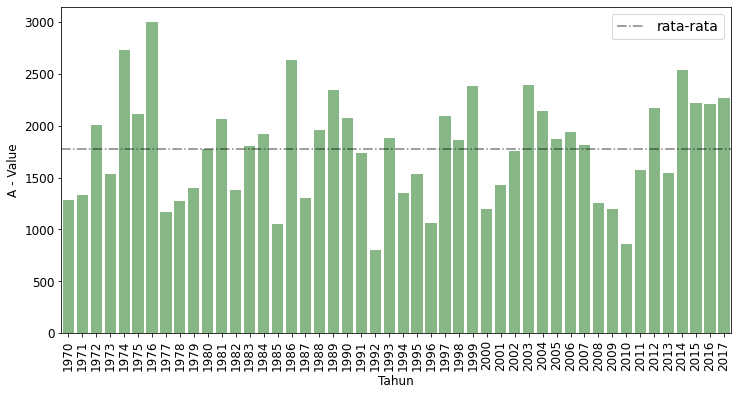

In [68]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(year_tot.index, a_tot, alpha=0.5, color='green')
plt.axhline(y=a_ave, color='k', linestyle='-.', 
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('A - Value')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()